In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
data['isTrain'] = 1

In [3]:
test = pd.read_csv("test.csv")
test['isTrain'] = 0
test['Survived'] = 1

In [4]:
data = pd.concat([data, test], axis=0)
data.reset_index(inplace=True)

In [5]:
data.head()

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,isTrain
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,1
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,1
2,2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,1
4,4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1


In [6]:
data.drop('PassengerId', axis=1, inplace=True)
data.describe()

,index,Age,Fare,Parch,Pclass,SibSp,Survived,isTrain
count,1309.000000,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,369.478992,29.881138,33.295479,0.385027,2.294882,0.498854,0.580596,0.680672
std,248.767105,14.413493,51.758668,0.865560,0.837836,1.041658,0.493650,0.466394
min,0.000000,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,163.000000,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000,0.000000
50%,327.000000,28.000000,14.454200,0.000000,3.000000,0.000000,1.000000,1.000000
75%,563.000000,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000,1.000000
max,890.000000,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000,1.000000


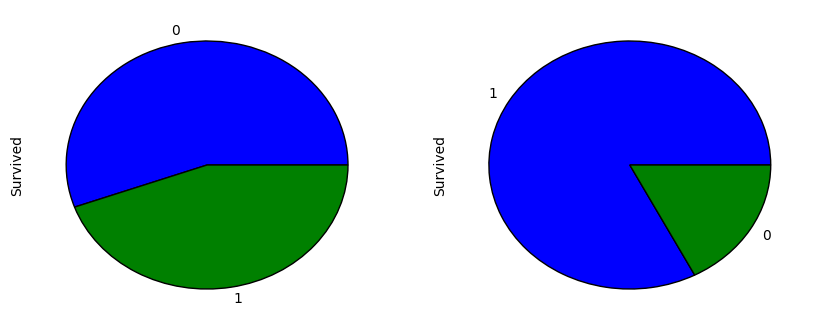

In [7]:
fig = plt.figure(figsize=(10, 4))
fig.add_subplot(121)
data.Survived[data['Sex'] == 'male'].value_counts().plot(kind='pie')
fig.add_subplot(122)
data.Survived[data['Sex'] == 'female'].value_counts().plot(kind='pie')

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

In [10]:
data['Name'] = data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
data['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [11]:
group = data.groupby('Name')

In [12]:
data['Age'] = data.groupby('Name')['Age'].apply(lambda x: x.fillna(x.median()))

In [13]:
data.head()

,index,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,isTrain
0,0,22.0,NaN,S,7.2500,Mr,0,3,1,1,0,A/5 21171,1
1,1,38.0,C85,C,71.2833,Mrs,0,1,0,1,1,PC 17599,1
2,2,26.0,NaN,S,7.9250,Miss,0,3,0,0,1,STON/O2. 3101282,1
3,3,35.0,C123,S,53.1000,Mrs,0,1,0,1,1,113803,1
4,4,35.0,NaN,S,8.0500,Mr,0,3,1,0,0,373450,1


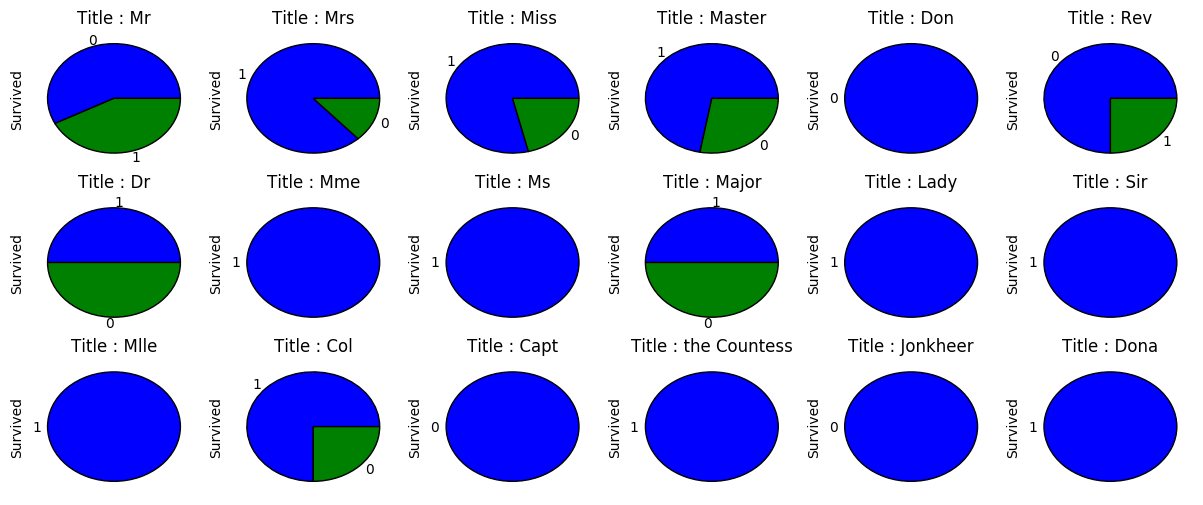

In [14]:
fig = plt.figure(figsize=(15, 6))

i=1
for title in data['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    data.Survived[data['Name'] == title].value_counts().plot(kind='pie')
    i += 1

In [15]:
data.Name.isnull().sum()

0

In [16]:
replacement = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7,
    'Dona': 0
}

data['Name'] = data['Name'].apply(lambda x: replacement.get(x))

In [17]:
data.Name.unique()

array([1, 6, 5, 4, 0, 2, 7, 3], dtype=int64)

In [18]:
from sklearn.preprocessing import StandardScaler
data['Name'] = StandardScaler().fit_transform(data['Name'].values.reshape(-1, 1))

C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [19]:
data['Age'] = StandardScaler().fit_transform(data['Name'].values.reshape(-1, 1))

In [20]:
data['Fare'] = data.groupby('Pclass')['Fare'].apply(lambda x: x.fillna(x.median()))
data.Fare.isnull().sum()

0

In [21]:
data['Fare'] = StandardScaler().fit_transform(data['Fare'].values.reshape(-1, 1))

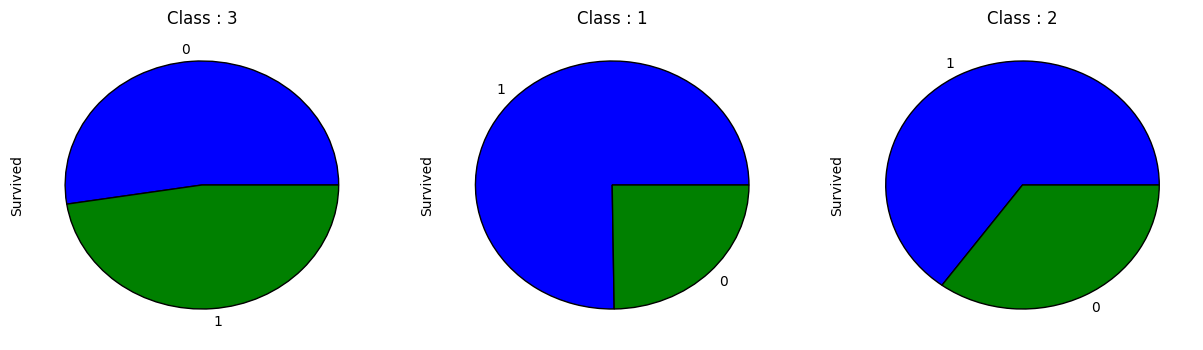

In [22]:
fig = plt.figure(figsize=(15,4))

i=1
for pclass in data['Pclass'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Class : {}'.format(pclass))
    data.Survived[data['Pclass'] == pclass].value_counts().plot(kind='pie')
    i += 1

In [23]:
data['Pclass'] = StandardScaler().fit_transform(data['Pclass'].values.reshape(-1, 1))

C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [24]:
data['Cabin'].isnull().sum()

1014

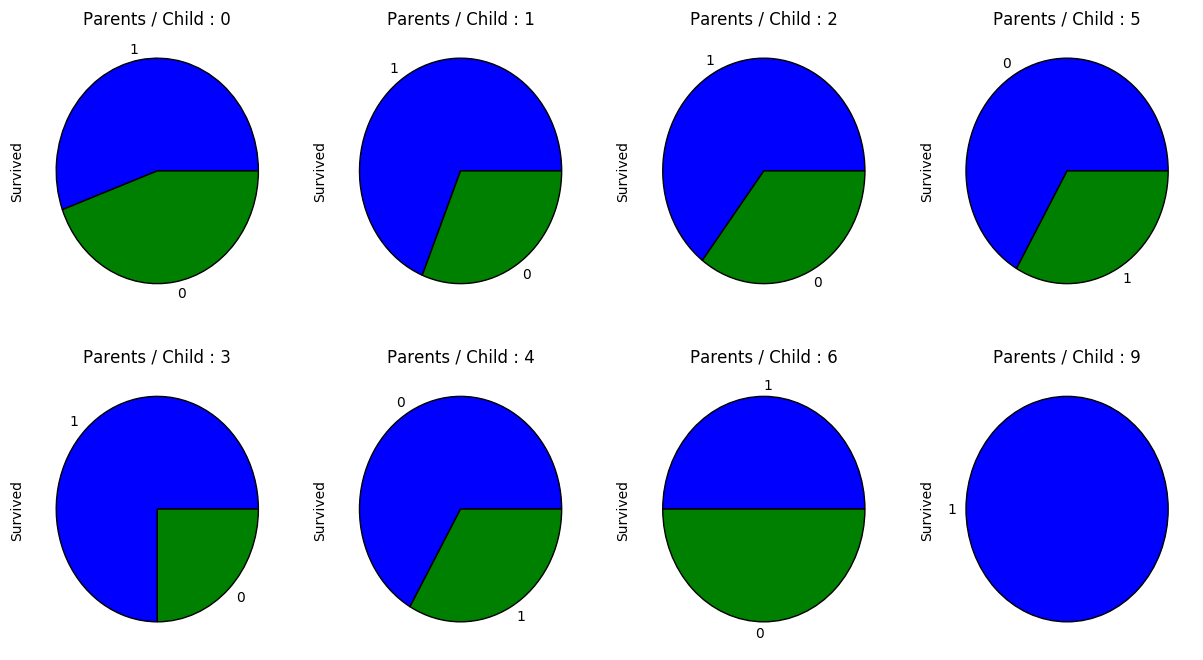

In [25]:
fig = plt.figure(figsize=(15,8))
i = 0
for parch in data['Parch'].unique():
    fig.add_subplot(2, 4, i+1)
    plt.title('Parents / Child : {}'.format(parch))
    data.Survived[data['Parch'] == parch].value_counts().plot(kind='pie')
    i += 1

In [26]:
replacement = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5,
    9: 1
}
data['Parch'] = data['Parch'].apply(lambda x: replacement.get(x))
data['Parch'] = StandardScaler().fit_transform(data['Parch'].values.reshape(-1, 1))

C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [27]:
data.drop(['Ticket'], axis=1, inplace=True)

In [28]:
data['Embarked'].fillna('S', inplace=True)

In [29]:
replacement = {
    'S': 0,
    'Q': 1,
    'C': 2
}

data['Embarked'] = data['Embarked'].apply(lambda x: replacement.get(x))
data['Embarked'] = StandardScaler().fit_transform(data['Embarked'].values.reshape(-1, 1))
data.head()['Embarked']

C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


0   -0.622279
1    1.834926
2   -0.622279
3   -0.622279
4   -0.622279
Name: Embarked, dtype: float64

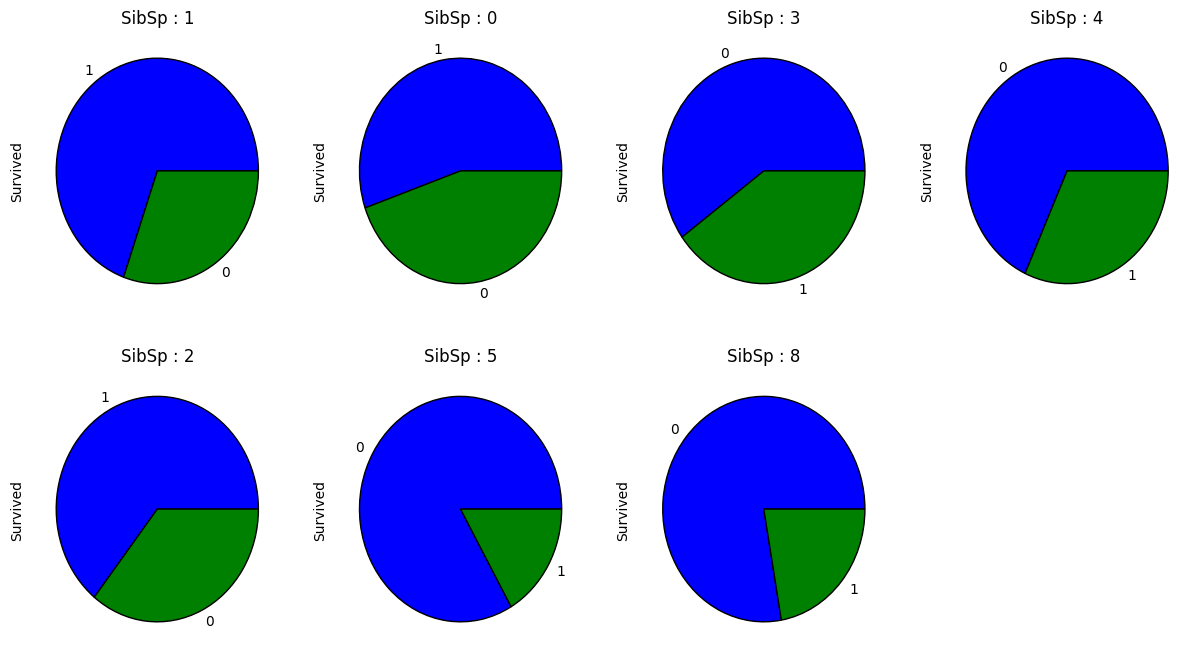

In [30]:
fig = plt.figure(figsize=(15,8))
i = 1
for sibsp in data['SibSp'].unique():
    fig.add_subplot(2, 4, i)
    plt.title('SibSp : {}'.format(sibsp))
    data.Survived[data['SibSp'] == sibsp].value_counts().plot(kind='pie')
    i += 1

In [31]:
replacement = {
    5: 0,
    8: 0,
    4: 1,
    3: 2,
    0: 3,
    2: 4,
    1: 5
}

data['SibSp'] = data['SibSp'].apply(lambda x: replacement.get(x))
data['SibSp'] = StandardScaler().fit_transform(data['SibSp'].values.reshape(-1, 1))
data.head()['SibSp']

C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


0    1.562046
1    1.562046
2   -0.435725
3    1.562046
4   -0.435725
Name: SibSp, dtype: float64

In [32]:
data['Cabin'].fillna('U', inplace=True)
data['Cabin'] = data['Cabin'].apply(lambda x: x[0])
data['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

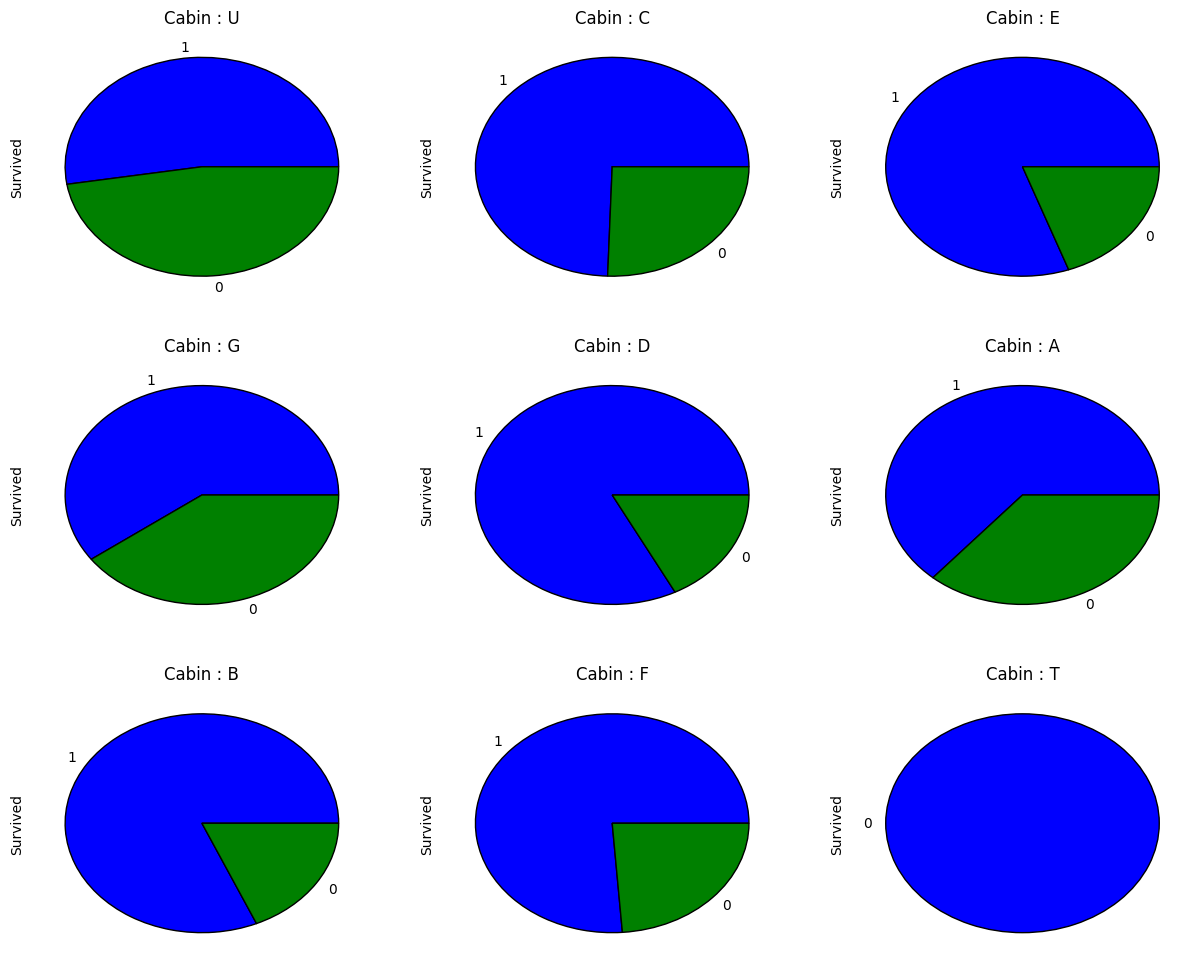

In [33]:
fig = plt.figure(figsize=(15,12))
i = 1
for cabin in data['Cabin'].unique():
    fig.add_subplot(3, 3, i)
    plt.title('Cabin : {}'.format(cabin))
    data.Survived[data['Cabin'] == cabin].value_counts().plot(kind='pie')
    i += 1

In [34]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

data['Cabin'] = data['Cabin'].apply(lambda x: replacement.get(x))
data['Cabin'] = StandardScaler().fit_transform(data['Cabin'].values.reshape(-1, 1))
data.head()['Cabin']

C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


0   -0.489356
1    1.000334
2   -0.489356
3    1.000334
4   -0.489356
Name: Cabin, dtype: float64

In [35]:
data.head()

,index,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,isTrain
0,0,-0.804488,-0.489356,-0.622279,-0.503176,-0.804488,-0.457731,0.841916,1,1.562046,0,1
1,1,1.521207,1.000334,1.834926,0.734809,1.521207,-0.457731,-1.546098,0,1.562046,1,1
2,2,1.056068,-0.489356,-0.622279,-0.490126,1.056068,-0.457731,0.841916,0,-0.435725,1,1
3,3,1.521207,1.000334,-0.622279,0.383263,1.521207,-0.457731,-1.546098,0,1.562046,1,1
4,4,-0.804488,-0.489356,-0.622279,-0.487709,-0.804488,-0.457731,0.841916,1,-0.435725,0,1


In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [37]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
test = data[data['isTrain'] != 1]
test.drop('isTrain', axis=1, inplace=True)
data = data[data['isTrain'] == 1]
data.drop('isTrain', axis=1, inplace=True)
survived = data['Survived']
data.drop('Survived', axis=1, inplace=True)

C:\Users\Personal\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Personal\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Personal\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, survived, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [41]:
test.drop('Survived', axis=1, inplace=True)

C:\Users\Personal\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
model.score(X_test, y_test)

0.82122905027932958

In [43]:
res = model.predict(test)

In [44]:
test.head()

,index,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp
891,0,-0.804488,-0.489356,0.606323,-0.491978,-0.804488,-0.457731,0.841916,1,-0.435725
892,1,1.521207,-0.489356,-0.622279,-0.508010,1.521207,-0.457731,0.841916,0,1.562046
893,2,-0.804488,-0.489356,0.606323,-0.456051,-0.804488,-0.457731,-0.352091,1,-0.435725
894,3,-0.804488,-0.489356,-0.622279,-0.475868,-0.804488,-0.457731,0.841916,1,-0.435725
895,4,1.521207,-0.489356,-0.622279,-0.405784,1.521207,2.187610,0.841916,0,1.562046


In [45]:
submit = pd.read_csv("submit.csv")

In [46]:
submit['Survived'] = res

In [47]:
submit.to_csv('submit.csv', index=None)

In [49]:
!conda install tflearn

Solving environment: ...working... failed



PackagesNotFoundError: The following packages are not available from current channels:

  - tflearn

Current channels:

  - https://conda.anaconda.org/bioninja/win-64
  - https://conda.anaconda.org/bioninja/noarch
  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/win-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/pro/win-64
  - https://repo.anaconda.com/pkgs/pro/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch




In [50]:
!pip install tflearn

  Running setup.py bdist_wheel for tflearn: started
  Running setup.py bdist_wheel for tflearn: finished with status 'done'
  Stored in directory: C:\Users\Personal\AppData\Local\pip\Cache\wheels\d0\f6\69\0ef3ee395aac2e5d15d89efd29a9a216f3c27767b43b72c006
Successfully built tflearn


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [51]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [52]:
!dir

 Volume in drive E is studies
 Volume Serial Number is 4CCC-50EC

 Directory of E:\machine learning competitions\kaggle\titanic_survival

06/01/2018  11:51 PM    <DIR>          .
06/01/2018  11:51 PM    <DIR>          ..
05/21/2018  07:57 PM    <DIR>          .ipynb_checkpoints
01/17/2018  08:05 PM               171 clt.R
01/15/2018  07:11 AM             3,258 gender_submission.csv
06/01/2018  11:19 PM             3,258 submit.csv
01/15/2018  07:11 AM            28,629 test.csv
05/21/2018  08:09 PM            76,451 titanic.ipynb
01/16/2018  12:54 PM             6,205 titanic.R
01/16/2018  06:39 PM        14,026,319 titanicData.RData
02/03/2018  11:51 PM            14,798 titanic_survival.ipynb
01/15/2018  07:11 AM            61,194 train.csv
06/01/2018  11:51 PM           505,875 Untitled.ipynb
03/07/2018  07:09 PM               572 Untitled1.ipynb
              11 File(s)     14,726,730 bytes
               3 Dir(s)  79,273,738,240 bytes free
